## PSI 2019-2020 - TD06 Traitement d'image

### Préliminaires sur Capytale

#### 0. Chargement des modules complémentaires (normalement inutile désormais) [Exécuter la cellule suivante]

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip ##python -m pip install --upgrade pip
!{sys.executable} -m pip install scikit-image
# note : masquer la sortie
#https://www.it-swarm.dev/fr/ipython/jupyter-notebook-commande-pour-masquer-la-sortie-dune-cellule/824351765/


Usage:   
  D:\WPy-3710\python-3.7.1.amd64\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  D:\WPy-3710\python-3.7.1.amd64\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  D:\WPy-3710\python-3.7.1.amd64\python.exe -m pip install [options] [-e] <vcs project url> ...
  D:\WPy-3710\python-3.7.1.amd64\python.exe -m pip install [options] [-e] <local project path> ...
  D:\WPy-3710\python-3.7.1.amd64\python.exe -m pip install [options] <archive url/path> ...

no such option: -m


### 1. Exécuter la cellule suivante pour télécharger l'image et la placer dans un répertoire Images

In [2]:
def download_image(repository, image_nom, image_extension, rep_cible):
    # Chargement de l'image à partir de son url 
    import requests
    from PIL import Image
    from io import BytesIO

    img_url = repository + image_nom + '.' + image_extension
    response = requests.get(img_url)
    img_data = response.content
    img = Image.open(BytesIO(img_data))

    # Conversion de l'image au format d'un tableau numpy (np.array)
    import numpy as np
    im = np.array(img)

    # Création si besoin du répertoire Images
    import os
    rep_dst = "Images"
    if rep_dst not in os.listdir() or not os.path.isdir(rep_dst):
        os.mkdir(rep_dst)
    
    # Enregistrement de l'image dans son format d'origine dans le répertoire Images
    from skimage import io
    io.imsave(os.path.join(rep_dst, image_nom + '.' + image_extension), im)

## téléchargement des images
# Données pour le téléchargement de l'image
repository = 'https://capytale.ac-paris.fr/pj/75/luc.baille/'
#image n° 1 :
image_nom = 'joconde'
image_extension = 'png'
rep_cible = 'Images'
download_image(repository, image_nom, image_extension, rep_cible)
#image n° 2 :
image_nom = 'SN_REFSDAL_hs-2015-08-c-full_tif'
image_extension = 'tif'
download_image(repository, image_nom, image_extension, rep_cible)

## Notes : images ; haute résolution (?) http://www.astrosurf.com/luxorion/photo-hrdragesco.htm
## https://www.google.com/search?q=image+haute+resolution&safe=active&client=firefox-b-d&sxsrf=ALeKk02a7cc0yxQePPygVw3wXHV0gQCRNA:1583658480084&tbm=isch&source=iu&ictx=1&fir=xbggVoE-KjlP6M%253A%252CKkjwPxIaKlfjOM%252C_&vet=1&usg=AI4_-kRi7JCxL71VgAiUYnYxVXZ0b1zTmw&sa=X&ved=2ahUKEwixmZrJw4roAhU_DmMBHfWNBvgQ9QEwCnoECAoQKA#imgrc=xbggVoE-KjlP6M:

#### 2. Vérification de l'arborescence des répertoires (présence du répertoire Images)

In [3]:
import os
##affichage du contenu du répertoire courant
print(os.listdir()) #vous devez y trouver le nom de ce notebook jupyter, ainsi que le répertoire "Images"

['.ipynb_checkpoints', 'a.npy', 'b.npy', 'Images', 'IPT_PSI-TD06 2019-2020 Traitement Image v5 - Capytale - prof.ipynb', 'IPT_PSI-TD06 2019-2020 Traitement Image v6_CR - Capytale - eleve.ipynb', 'IPT_PSI-TD06 2019-2020 Traitement Image v6_CR - Capytale - prof.ipynb', 'IPT_PSI-TD06 2019-2020_Traitement Image v1_4 pages.docx', 'monalisaNBtramage_seuil=0.25.bmp', 'monalisaNBtramage_seuil=0.25_true.bmp', 'monalisaNBtramage_seuil=0.5.bmp', 'monalisaNBtramage_seuil=0.5_true.bmp', 'sauvegardes_numpy.py', 'TD03 traitement image old', '~$T_PSI-TD06 2019-2020_Traitement Image v1_4 pages.docx']


#### 3. Vérification du téléchargement des images dans le répertoire Images

In [4]:
print(os.listdir('Images'))

['aldebaran-s-g-Gc-k-NPkA-unsplash.jpg', 'aldebaran2.jpg', 'aldebaran2_from_uint64.bmp', 'aldebaran2_from_uint8.bmp', 'cassiopee.jpg', 'cathedrale-Rouen.jpg', 'cats-eye-nebula-100318-02.jpg', 'CCP_poireauxNB.PNG', 'CCP_poireauxNG.PNG', 'CCP_poireauxRGB.PNG', 'factory-1880261_1920.jpg', 'hs-2011-11-a-full_tif.tif', 'hs-2015-08-b-full_tif.tif', 'image_apres_deformation.png', 'image_avant_deformation.png', 'joconde.png', 'La-Joconde-en-Hd.2.4-Mo-.jpg', 'lena.jpg', 'monalisa.jpg', 'Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg', 'Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched_low (1).jpg', 'neonbrand-lbqZUefMLvQ-unsplash.jpg', 'poireaux00.jfif', 'poireaux01.jfif', 'poireaux02.jfif', 'poireaux03.jfif', 'poireaux04.jfif', 'poireaux05.jfif', 'poireaux06.jfif', 'poireaux07.jfif', 'poireaux08.jfif', 'poireaux09.jfif', 'SN REFSDAL_hs-2015-08-b-xlarge_web.jpg', 'SN REFSDAL_hs-2015-08-c-full_tif.tif', 'SN_REFSDAL_hs-2015-08-c-full_tif.tif']


# Début du corrigé

### 1.2.1 Chargement d'une image, sauvegarde, visualisation

In [5]:
from skimage import io

In [6]:
im = io.imread('Images/joconde.png') #on préfixe le nom du nom du répertoire contenant l'image

Note : Capytale étant sous un système Linux, le symbole pour passer d'un répertoire à son contenu est un slash ('/') et non un anticlash "\" (éventuellement doublé pour sa bonne compréhension par Python) comme sur un système Windows.

In [7]:
## tableau numpy im contenant les données de l'image
im

array([[[ 90, 103,  83],
        [ 85, 103,  81],
        [ 81, 105,  81],
        ...,
        [ 67,  82,  61],
        [ 71,  85,  62],
        [ 75,  78,  69]],

       [[ 93, 108,  79],
        [ 89, 108,  78],
        [ 86, 110,  78],
        ...,
        [ 78, 101,  55],
        [ 83, 102,  56],
        [ 70,  80,  46]],

       [[ 99, 115,  79],
        [ 96, 113,  77],
        [ 94, 116,  78],
        ...,
        [ 87, 115,  66],
        [ 90, 114,  64],
        [ 98, 107,  90]],

       ...,

       [[ 41,  30,  60],
        [ 13,   2,  32],
        [ 21,  10,  40],
        ...,
        [ 12,   4,  28],
        [ 13,   5,  29],
        [ 28,  20,  43]],

       [[ 57,  51,  79],
        [ 18,  12,  40],
        [ 20,  14,  42],
        ...,
        [  7,   5,  29],
        [  9,   7,  31],
        [ 67,  60,  78]],

       [[ 74,  70,  97],
        [ 26,  22,  49],
        [ 22,  18,  45],
        ...,
        [ 16,  18,  41],
        [ 21,  23,  46],
        [ 79,  75,  90]]

#### Sauvegarde d'un array numpy représentant une image dans le répertoire Images  sous la forme d'une image dans un format fixé par la valeur de l'extension
Ici l'image d'origine sous un nouveau nom

In [8]:
io.imsave('Images/joconde2.png', im)
io.imsave('Images/joconde2.jpg', im)
io.imsave('Images/joconde2.bmp', im)

### Obtenir la taille des fichiers enregistrés sur le disque  
On observe l'influence de l'effet de la compression pour les formats .png, .jpg (compressés).  
Pour le format .bmp, non compressé, la taille correspond exactement au nombre de valeurs dans la matrice.
Chaque valeur occupe un octet en mémoire car la matrice numpy contient des données au format 'uint8' (comme on le verra ci-après)

In [9]:
import os 
for image in os.listdir('Images'):
    print("Nom fichier :", image, "Taille fichier (en octets) :", os.path.getsize('Images/' + image))

Nom fichier : aldebaran-s-g-Gc-k-NPkA-unsplash.jpg Taille fichier (en octets) : 2546852
Nom fichier : aldebaran2.jpg Taille fichier (en octets) : 1950441
Nom fichier : aldebaran2_from_uint64.bmp Taille fichier (en octets) : 54573350
Nom fichier : aldebaran2_from_uint8.bmp Taille fichier (en octets) : 54573350
Nom fichier : cassiopee.jpg Taille fichier (en octets) : 11068
Nom fichier : cathedrale-Rouen.jpg Taille fichier (en octets) : 226616
Nom fichier : cats-eye-nebula-100318-02.jpg Taille fichier (en octets) : 59056
Nom fichier : CCP_poireauxNB.PNG Taille fichier (en octets) : 401587
Nom fichier : CCP_poireauxNG.PNG Taille fichier (en octets) : 316693
Nom fichier : CCP_poireauxRGB.PNG Taille fichier (en octets) : 735785
Nom fichier : factory-1880261_1920.jpg Taille fichier (en octets) : 1009891
Nom fichier : hs-2011-11-a-full_tif.tif Taille fichier (en octets) : 125669036
Nom fichier : hs-2015-08-b-full_tif.tif Taille fichier (en octets) : 30895760
Nom fichier : image_apres_deformati

#### Visualisation d'une image

In [10]:
io.imshow(im)
io.show()

<Figure size 640x480 with 1 Axes>

### 1.2.2	Caractéristiques d’une image (tableau numpy)

In [11]:
f = io.imread('Images/SN_REFSDAL_hs-2015-08-c-full_tif.tif') ## lecture du fichier et chargement dans un array numpy

In [12]:
##caractéristiques de la matrice
type(f), f.dtype, f.shape, f.size

(numpy.ndarray, dtype('uint8'), (940, 940, 3), 2650800)

L'image est représentée par un array numpy,  
les valeurs dans chaque cellule sont de type 'uint8'  
(entier non signé (i.e. positif, "unsigned") codé sur 8 bits),  
L'image comporte 940 lignes, 940 colonnes, 3 couleurs (r, v, b).
La matrice comporte 940 * 940 * 3 niveaux de couleurs (chacun est codé par un entier compris entre 0 et 255)  
940 * 940 * 3 = 2 650 800 (correspondant à la taille du fichier en octets, sur le disque, si le format est .bmp)  
Note : la taille du fichier au format .bmp est en vérité 116214 (> 115 920) car dans le fichier sont stockées des métadonnées

In [13]:
io.imsave('Images/SN_REFSDAL2.bmp', f)
print(os.path.getsize('Images/SN_REFSDAL2.bmp'))

2650854


In [14]:
#
print(os.path.getsize('Images/SN_REFSDAL_hs-2015-08-c-full_tif.tif'))

2651089


Note : la taille du fichier au format .bmp est en vérité 2650854 (> 2 650 800) car dans le fichier sont stockées des métadonnées

In [15]:
5029 * 3617 * 3

54569679

In [16]:
import os
metadata = os.stat('Images/SN_REFSDAL2.bmp')
print(metadata)

os.stat_result(st_mode=33206, st_ino=281474977187865, st_dev=1111651334, st_nlink=1, st_uid=0, st_gid=0, st_size=2650854, st_atime=1583702567, st_mtime=1583702567, st_ctime=1583702566)


##### conversion au format flottant 

In [17]:
f #matrice numpy telle qu'importée

array([[[ 64,  59,  38],
        [ 64,  59,  38],
        [ 64,  59,  38],
        ...,
        [138, 139, 153],
        [138, 139, 153],
        [138, 139, 153]],

       [[ 64,  59,  38],
        [ 64,  59,  38],
        [ 64,  59,  37],
        ...,
        [138, 139, 153],
        [138, 139, 153],
        [138, 139, 153]],

       [[ 64,  60,  38],
        [ 64,  59,  37],
        [ 64,  59,  38],
        ...,
        [138, 139, 153],
        [138, 139, 153],
        [138, 139, 153]],

       ...,

       [[ 40,  35,   0],
        [ 40,  35,   0],
        [ 40,  35,   0],
        ...,
        [ 37,  33,  35],
        [ 37,  33,  35],
        [ 36,  32,  34]],

       [[ 41,  36,   0],
        [ 40,  35,   0],
        [ 40,  35,   0],
        ...,
        [ 36,  32,  34],
        [ 36,  33,  35],
        [ 36,  32,  34]],

       [[ 40,  35,   0],
        [ 40,  35,   0],
        [ 40,  35,   0],
        ...,
        [ 36,  32,  34],
        [ 36,  32,  34],
        [ 36,  32,  34]]

In [18]:
import skimage as sk
#https://scikit-image.org/docs/dev/api/skimage.html (Utility Functions)
ff = sk.img_as_float(f)

In [19]:
## on a maintenant un tableau de flottants
ff

array([[[0.25098039, 0.23137255, 0.14901961],
        [0.25098039, 0.23137255, 0.14901961],
        [0.25098039, 0.23137255, 0.14901961],
        ...,
        [0.54117647, 0.54509804, 0.6       ],
        [0.54117647, 0.54509804, 0.6       ],
        [0.54117647, 0.54509804, 0.6       ]],

       [[0.25098039, 0.23137255, 0.14901961],
        [0.25098039, 0.23137255, 0.14901961],
        [0.25098039, 0.23137255, 0.14509804],
        ...,
        [0.54117647, 0.54509804, 0.6       ],
        [0.54117647, 0.54509804, 0.6       ],
        [0.54117647, 0.54509804, 0.6       ]],

       [[0.25098039, 0.23529412, 0.14901961],
        [0.25098039, 0.23137255, 0.14509804],
        [0.25098039, 0.23137255, 0.14901961],
        ...,
        [0.54117647, 0.54509804, 0.6       ],
        [0.54117647, 0.54509804, 0.6       ],
        [0.54117647, 0.54509804, 0.6       ]],

       ...,

       [[0.15686275, 0.1372549 , 0.        ],
        [0.15686275, 0.1372549 , 0.        ],
        [0.15686275, 0

In [20]:
## retour à un format entier ('uint16')
fff = sk.img_as_uint(ff)
fff

D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


array([[[16448, 15163,  9766],
        [16448, 15163,  9766],
        [16448, 15163,  9766],
        ...,
        [35466, 35723, 39321],
        [35466, 35723, 39321],
        [35466, 35723, 39321]],

       [[16448, 15163,  9766],
        [16448, 15163,  9766],
        [16448, 15163,  9509],
        ...,
        [35466, 35723, 39321],
        [35466, 35723, 39321],
        [35466, 35723, 39321]],

       [[16448, 15420,  9766],
        [16448, 15163,  9509],
        [16448, 15163,  9766],
        ...,
        [35466, 35723, 39321],
        [35466, 35723, 39321],
        [35466, 35723, 39321]],

       ...,

       [[10280,  8995,     0],
        [10280,  8995,     0],
        [10280,  8995,     0],
        ...,
        [ 9509,  8481,  8995],
        [ 9509,  8481,  8995],
        [ 9252,  8224,  8738]],

       [[10537,  9252,     0],
        [10280,  8995,     0],
        [10280,  8995,     0],
        ...,
        [ 9252,  8224,  8738],
        [ 9252,  8481,  8995],
        [ 9252,

In [21]:
## retour à un format entier ('uint8')
ffff = sk.img_as_ubyte(ff)
ffff

D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


array([[[ 64,  59,  38],
        [ 64,  59,  38],
        [ 64,  59,  38],
        ...,
        [138, 139, 153],
        [138, 139, 153],
        [138, 139, 153]],

       [[ 64,  59,  38],
        [ 64,  59,  38],
        [ 64,  59,  37],
        ...,
        [138, 139, 153],
        [138, 139, 153],
        [138, 139, 153]],

       [[ 64,  60,  38],
        [ 64,  59,  37],
        [ 64,  59,  38],
        ...,
        [138, 139, 153],
        [138, 139, 153],
        [138, 139, 153]],

       ...,

       [[ 40,  35,   0],
        [ 40,  35,   0],
        [ 40,  35,   0],
        ...,
        [ 37,  33,  35],
        [ 37,  33,  35],
        [ 36,  32,  34]],

       [[ 41,  36,   0],
        [ 40,  35,   0],
        [ 40,  35,   0],
        ...,
        [ 36,  32,  34],
        [ 36,  33,  35],
        [ 36,  32,  34]],

       [[ 40,  35,   0],
        [ 40,  35,   0],
        [ 40,  35,   0],
        ...,
        [ 36,  32,  34],
        [ 36,  32,  34],
        [ 36,  32,  34]]

## Compléments sur la manipulation des images sous forme d'arrays numpy (supplément au TD)

#### Chargement des modules utilisés

In [22]:
from skimage import io
import numpy as np

#### Chargement de l'image

In [23]:
im = io.imread('Images/joconde.png')

### Extraction de données de l'image

In [24]:
#niveaux de couleurs (r, v, b) du pixel en ligne 0 et colonne 0 avec les deux syntaxes possibles

In [25]:
im[0][0], im[0, 0]

(array([ 90, 103,  83], dtype=uint8), array([ 90, 103,  83], dtype=uint8))

In [26]:
##accès aux valeurs [ici niveau de rouge pour le pixel en ligne 0 et colonne 0 avec les deux syntaxes possibles]
im[0][0][0], im[0, 0, 0]

(90, 90)

In [27]:
im[0] ##première ligne

array([[ 90, 103,  83],
       [ 85, 103,  81],
       [ 81, 105,  81],
       [ 75, 107,  83],
       [ 66, 105,  78],
       [ 59,  99,  72],
       [ 58, 101,  73],
       [ 64, 107,  79],
       [ 68, 102,  75],
       [ 67, 102,  72],
       [ 61,  92,  61],
       [ 73, 102,  72],
       [ 80, 109,  81],
       [ 74, 104,  80],
       [ 73, 107,  83],
       [ 66,  99,  80],
       [ 59,  92,  65],
       [ 68, 101,  74],
       [ 75, 105,  77],
       [ 72, 103,  72],
       [ 68,  97,  66],
       [ 66,  96,  62],
       [ 62,  92,  56],
       [ 58,  88,  52],
       [ 64,  95,  61],
       [ 63,  97,  64],
       [ 65, 100,  68],
       [ 67, 104,  73],
       [ 69, 106,  75],
       [ 68, 103,  71],
       [ 65,  99,  66],
       [ 63,  94,  60],
       [ 68,  85,  49],
       [ 74,  96,  60],
       [ 71,  98,  65],
       [ 58,  89,  58],
       [ 49,  84,  54],
       [ 54,  89,  57],
       [ 59,  94,  61],
       [ 59,  94,  61],
       [ 61,  95,  62],
       [ 58,  92

In [28]:
im[:,0,:] ##première colonne

array([[ 90, 103,  83],
       [ 93, 108,  79],
       [ 99, 115,  79],
       [106, 122,  86],
       [112, 127,  98],
       [116, 129, 101],
       [119, 130,  96],
       [119, 132,  89],
       [115, 127,  87],
       [115, 127,  87],
       [115, 126,  84],
       [113, 122,  79],
       [110, 117,  75],
       [110, 117,  73],
       [115, 121,  75],
       [118, 124,  78],
       [124, 125,  67],
       [118, 121,  64],
       [116, 123,  69],
       [120, 129,  76],
       [122, 131,  78],
       [122, 129,  77],
       [125, 128,  73],
       [129, 129,  75],
       [128, 131,  78],
       [123, 126,  73],
       [121, 124,  71],
       [124, 128,  77],
       [125, 129,  78],
       [119, 126,  74],
       [115, 122,  71],
       [115, 122,  71],
       [121, 122,  78],
       [120, 121,  77],
       [123, 125,  78],
       [129, 128,  80],
       [129, 129,  79],
       [126, 124,  73],
       [126, 125,  71],
       [130, 129,  75],
       [152, 149,  96],
       [141, 138

#### Extraction d'une des composantes de couleur 

In [29]:
im[:,:,0] ##tableau des niveaux de rouge

array([[90, 85, 81, ..., 67, 71, 75],
       [93, 89, 86, ..., 78, 83, 70],
       [99, 96, 94, ..., 87, 90, 98],
       ...,
       [41, 13, 21, ..., 12, 13, 28],
       [57, 18, 20, ...,  7,  9, 67],
       [74, 26, 22, ..., 16, 21, 79]], dtype=uint8)

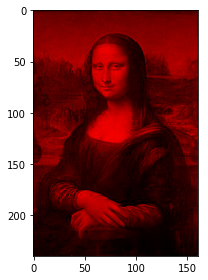

In [30]:
#affichage de la composante rouge seule (on annule les composantes verte (indice 1) et bleue (indice 2))
imRougeSeul = im.copy() #copie de l'image avex ses trois niveaux de couleur
imRougeSeul[:,:,1] = 0 #on met le niveau de vert à zéro pour les pixels sur toutes les lignes et toutes les colonnes
imRougeSeul[:,:,2] = 0 #on met le niveau de vert à zéro pour les pixels sur toutes les lignes et toutes les colonnes
## affichage de l'image obtenue
io.imshow(imRougeSeul)
io.show()

#### Extraction d'une partie de l'image

In [31]:
im_extraite = im[170:230, 30:100]

In [32]:
im_extraite.shape, im_extraite.size, im_extraite.dtype

((60, 70, 3), 12600, dtype('uint8'))

In [33]:
##récupération des données
h, w, c = im_extraite.shape
h, w, c

(60, 70, 3)

In [34]:
##nombre de valeurs
h * w * c

12600

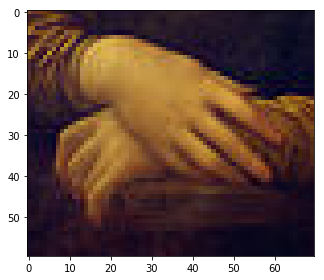

In [35]:
io.imshow(im_extraite)
io.show()

### Problèmes d'overflow avec le format 'uint8'

Prenons pour exemple un pixel pour lequel la somme des valeurs des niveaux r, v, b dépasse 255 :

In [36]:
r, v, b = im[0, 0] #pixel en ligne 0, colonne 0
print(r, v, b)

90 103 83


In [37]:
#format des données
type(r), type(v), type(b)

(numpy.uint8, numpy.uint8, numpy.uint8)

In [38]:
#valeur attendue de la somme (somme de valeurs entières au format int usuel)
90 + 103 + 83

276

In [39]:
#valeur obtenue pour la somme avec les données au format uint8
r + v + b

D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


20

In [40]:
#la valeur de la somme, excéde 255, donc c'est la valeur 276 % 256 qui est obtenue
276 % 256

20

In [41]:
#ceci correspond à une troncature de l'écriture binaire de 276, au-delà du 8ème bit (en commançant par la droite)
print("écriture binaire de 276 :", bin(276))
print("nombre de bits de l'écriture binaire de 276 :", len(bin(276)) - 2)
print("écriture binaire de 276, tronquée aux 8 bits de poids faible (8 derniers)")
print(bin(276)[-8:], len(bin(276)[-8:]))
print("entier codé par ces huit derniers bits :")
print(int(bin(276)[-8:], 2))

écriture binaire de 276 : 0b100010100
nombre de bits de l'écriture binaire de 276 : 9
écriture binaire de 276, tronquée aux 8 bits de poids faible (8 derniers)
00010100 8
entier codé par ces huit derniers bits :
20


#### Calcul de la moyenne de trois entiers au format uint8 en contournant les problèmes d'overflow

In [42]:
# en passant par le type int (qui ne présente pas de problème d'overflow)
r, v, b = im[0, 0]
moy = (int(r) + int(v) + int(b)) // 3 # quotient dans la division euclidienne par 3 (donne un arrondi par défaut)
print(np.uint8(moy)) #le résultat est au format int et on le convertit ici explicitement au format uint8

92


In [43]:
# en passant par le type float (ce qui ramène les valeurs entre 0 et 255 au format flottant, pour addition)
# on additionne trois valeurs flottantes, comprise chacune dans l'intervalle (de flottants) [0, 255/3]
# la somme est dans l'intervalle de flottants [0, 255] et on peut alors revenir au format uint8
r, v, b = im[0, 0]
moy = np.uint8(r/3 + v/3 + b/3)
print(moy)

92


### Instruction alternative d'affichage (pour info)

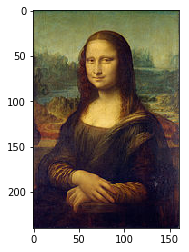

In [44]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show() ##facultatif sous Jupyter ; nécessaire avec IDLE

### Conversion en niveaux de gris, avec skimage

In [45]:
from skimage import io
im = io.imread('Images/joconde.png')

In [46]:
## format initial des données
im.dtype

dtype('uint8')

In [47]:
## conversion en niveaux de gris
#https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html
import skimage as sk

imNG = sk.color.rgb2gray(im)
imNG.shape, imNG.dtype

((240, 161), dtype('float64'))

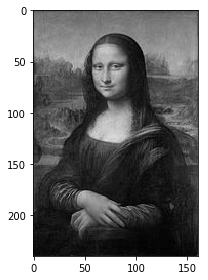

In [48]:
# visualisation
from skimage import io
io.imshow(imNG)
io.show()

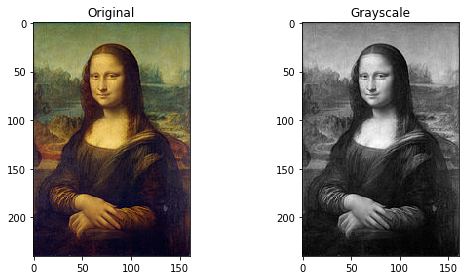

In [49]:
#visualisation 2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(im)
ax[0].set_title("Original")
ax[1].imshow(imNG, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

### Conversion de niveaux de gris en noir et blanc avec skimage

In [50]:
#https://scikit-image.org/docs/dev/api/skimage.html (Utility Functions)
from skimage import io
im = io.imread('Images/joconde.png')
import skimage as sk
imNG = sk.color.rgb2gray(im) #format 'float64' à ce stade
imNB = sk.img_as_bool(imNG)

D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\skimage\util\dtype.py:137: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


In [51]:
imNB

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

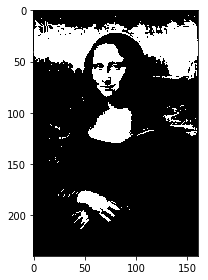

In [52]:
# visualisation
from skimage import io
io.imshow(imNB)
io.show()

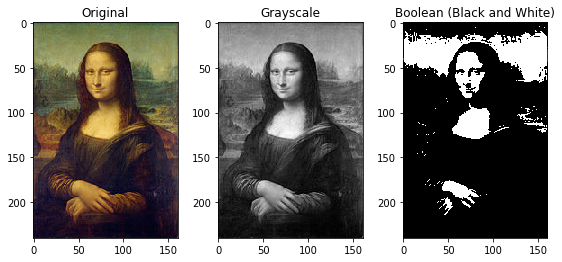

In [53]:
#visualisation 2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(im)
ax[0].set_title("Original")
ax[1].imshow(imNG, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
ax[2].imshow(imNB, cmap=plt.cm.gray)
ax[2].set_title("Boolean (Black and White)")

fig.tight_layout()
plt.show()

Note : color maps dans matplotlib.pyplot  
* https://matplotlib.org/tutorials/colors/colormaps.html
* https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
* https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html

### Divers (non mis en forme)

In [54]:
h, w = 200, 320 ; dtype = 'bool'
im0 = np.zeros((h, w), dtype = dtype)

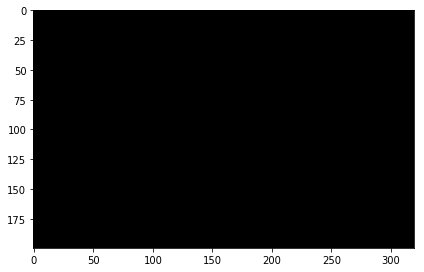

In [55]:
io.imshow(im0)

In [56]:
def cercle(r : int, nbcoul = 3, couleur = [255, 255, 255], dtype = 'uint8'):
    h, w = 2 * r + 1, 2 * r + 1
    ic, jc = r + 1, r + 1
    if nbcoul == 3:
        mat = np.zeros((h, w, 3), dtype = dtype)
    else :
        mat = np.zeros((h, w), dtype = dtype)
    for i in range(h):
        for j in range(w):
            if (i - r) ** 2 + (j - r) ** 2 <= r ** 2:
                mat[i, j] = couleur
    return mat

In [57]:
cercle(25, 1, True, 'bool')

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

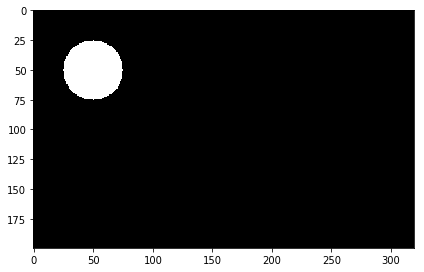

In [58]:
xc, yc, r = 100, 100, 25
im0[25: 25 + 2 * r + 1, 25: 25 + 2 * r + 1] = cercle(25, 1, True, 'bool')
io.imshow(im0)

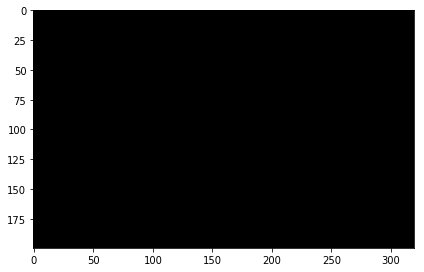

In [59]:
##image en niveaux de gris
h, w = 200, 320 ; dtype = 'uint8'
im1 = np.zeros((h, w), dtype = dtype)
io.imshow(im1)

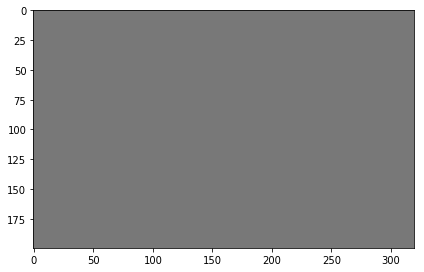

In [60]:
im1[:,:] = 120 + im1[:,:]
io.imshow(im1)

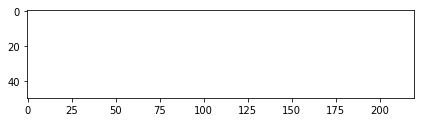

In [61]:
##image en couleurs
h, w = 50, 220 ; dtype = 'float64'
im2 = np.ones((h, w, 3), dtype = dtype)
io.imshow(im2)

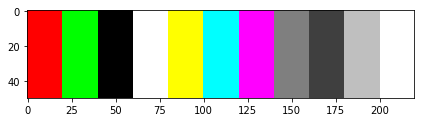

In [62]:
couleurs = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 0], [1, 1, 1], \
            [1, 1, 0], [0, 1, 1], [1, 0, 1], \
            [0.5, 0.5, 0.5], [0.25, 0.25, 0.25], [0.75, 0.75, 0.75]]
for j in range(20, len(couleurs) * 20, 20):
    im2[:, j - 20: j] = couleurs[j // 20]
io.imshow(im2)

## Retour au TP

### Exercice 1  
Créer, en respectant sa proportion de 8:5, une image du drapeau de la Suède, sous la forme d'un tableau numpy, avec pour format des données le type 'uint8', de 320 pixels de large, en respectant les spécifications ci-dessous  
Les dimensions du drapeau suédois sont de 5:2:9 horizontalement et 4:2:4 verticalement.  
Les couleurs du drapeau ont officiellement les côtes suivantes dans le « Natural Color System » :  

    NCS 0580-Y10R pour le jaune (RGB(249, 205, 48)),  
    NCS 4055-R95B pour le bleu (RGB(22, 101, 161)).	  

En imposant que l'image fasse 320 pixels de large, les dimensions sont :  
* horizontalement : 5 * 20 - 2 * 20 - 9 * 20 i.e. 100 - 40 - 180 (largeur totale 320)
* verticalement : 4 * 20 - 2 * 20 - 4 * 20 i.e. 80 - 40 - 80 (hauteur totale 200)

On commencera par créer une matrice de zéros, puis on affectera les valeurs *ad hoc* aux pixels.

### Exercice 1 - corrigé

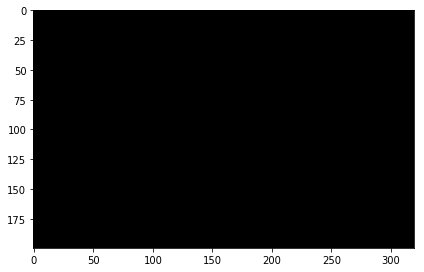

In [63]:
import numpy as np
# création d'un tableau numpy aux bonnes dimensions
n, m, c = 200, 320, 3 #n, m : nb de lignes, nb de colonnes ; on spécifie une 3e dimension car l'image est en couleur
drapeau = np.zeros((n, m, c), dtype = 'uint8') #c vaut trois car la couleur nécessite 3 valeurs sur les 3 canaux r, v, b
# le drapeau à ce stade est noir
io.imshow(drapeau)

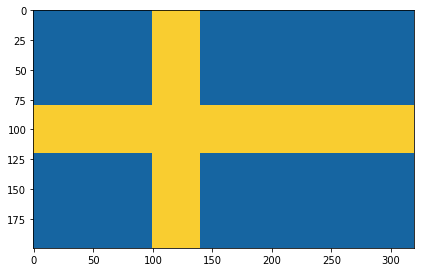

In [64]:
# on définit les couleurs à utiliser
bleu = np.array([22, 101, 161], dtype='uint8')
# ou simplement bleu = [22, 101, 161], Python assurant la conversion du type int à uint8
jaune = np.array([249, 205, 48], dtype='uint8') # ou jaune = [249, 205, 48]
# on passe à un fond bleu
drapeau[:,:] = bleu
# on colorie en jaune une bande horizontale (les lignes d'indice 80 à 119 deviennent jaunes)
drapeau[80:120, :] = jaune
# on colorie en jaune une bande verticale (les colonnes d'indice 100 à 139 deviennent jaunes)
drapeau[:, 100:140] = jaune
io.imshow(drapeau)
io.show()

### 1.2.3 Conversion en niveaux de gris

#### À l'aide de fonctions prédéfinies de numpy

In [65]:
import skimage as sk
from skimage import io
import numpy as np
imRVB=io.imread('Images/joconde.png')
print("Caractéristiques de l'image en couleurs :")
print(type(imRVB), imRVB.shape, imRVB.size, imRVB.dtype)
imNG=np.mean(im,axis=2)
print("Caractéristiques de l'image en niveaux de gris :")
print(type(imNG), imNG.shape, imNG.size, imNG.dtype)

Caractéristiques de l'image en couleurs :
<class 'numpy.ndarray'> (240, 161, 3) 115920 uint8
Caractéristiques de l'image en niveaux de gris :
<class 'numpy.ndarray'> (240, 161) 38640 float64


D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


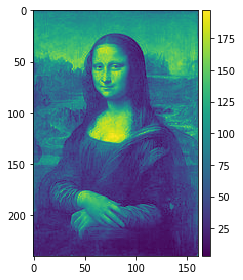

In [66]:
io.imshow(imNG); io.show()

ATTENTION : l'image apparaît avec des couleurs inattendues car la fonction np.mean a fait la moyenne de niveaux de couleurs, qui sont des valeurs entières entre 0 et 255, et a renvoyé pour chaque moyenne, une valeur FLOTTANTE, entre 0 et 225.  
Cette valeur est incorrectement interprétée car pour une image, si les niveaux de couleur sont au format flottants,  
ils doivent être compris dans l'intervalle [0, 1] (0 pour l'intensité minimale (soit noir pour une image en niveaux de gris), 1 pour l'intensité maximale (soit blanc pour une image en niveaux de gris))

#### Première façon de corriger

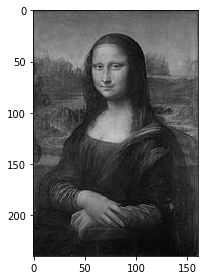

In [67]:
## conversion des valeurs flottantes de l'intervalle [0, 255] en valeurs au format uint8
imNG_uint8 = np.uint8(imNG)
io.imshow(imNG_uint8); io.show()

#### Deuxième façon de corriger

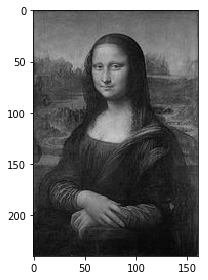

In [68]:
## conversion des valeurs flottantes de l'intervalle [0, 255] en valeurs flottantes ramenées dans l'intervalle [0, 1]
imNG_float_norm = imNG / 255.
io.imshow(imNG_float_norm); io.show()

### Exercice 2

In [69]:
import numpy as np

def convertNG(imRVB):
    #récupération des données de taille de l'image en couleur
    n, m, c = imRVB.shape #c prend la valeur 3
    dtypeRVB = imRVB.dtype
    #création d'une image en niveau de gris de même taille et même type pour les données
    imNG = np.zeros( (n, m), dtype = dtypeRVB)
    #parcours de l'image pour calculer la moyenne pondérée des niveaux de couleur pour chaque pixel
    for i in range(n):
        for j in range(m):
            r, v, b = imRVB[i, j]
            imNG[i, j] = np.uint8(0.2989 * r + 0.5870 * v + 0.1140 * b)
    return imNG

In [70]:
##test
imRVB = io.imread('Images/joconde.png')
imNG = convertNG(imRVB)
imNG

array([[ 96,  95,  95, ...,  75,  78,  76],
       [100,  98,  99, ...,  88,  91,  73],
       [106, 103, 105, ..., 101, 101, 102],
       ...,
       [ 36,   8,  16, ...,   9,  10,  25],
       [ 55,  16,  18, ...,   8,  10,  64],
       [ 74,  26,  22, ...,  20,  25,  77]], dtype=uint8)

taille de l'image en couleur au format bitmap (.bmp) : 116214
taille de l'image en niveaux de gris au format bitmap (.bmp) : 40438
l'image en niveaux de gris est de taille trois fois plus petite :
3 * tailleNG : 121314 ; tailleRVB : 116214
L'écart peut-être imputé aux metadonnées : 5100


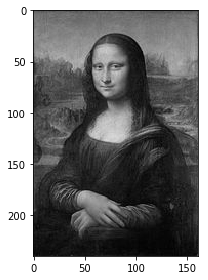

In [71]:
#sauvegarde au format .bmp (bitmap) de l'original en couleur et de l'image en niveaux de gris
io.imsave("Images/jocondeRVB.bmp", imRVB)
io.imsave("Images/jocondeNG.bmp", imNG)
#taille sur disque des deux images en octets
import os
print("taille de l'image en couleur au format bitmap (.bmp) :", os.path.getsize("Images/jocondeRVB.bmp"))
print("taille de l'image en niveaux de gris au format bitmap (.bmp) :", os.path.getsize("Images/jocondeNG.bmp"))
print("l'image en niveaux de gris est de taille trois fois plus petite :")
tailleRVB, tailleNG = os.path.getsize("Images/jocondeRVB.bmp"), os.path.getsize("Images/jocondeNG.bmp")
print("3 * tailleNG :", 3 * tailleNG, "; tailleRVB :", tailleRVB)
print("L'écart peut-être imputé aux metadonnées :", 3 * tailleNG - tailleRVB)
#affichage
io.imshow(imNG)
io.show()
## Notes : métadonnées https://python.developpez.com/tutoriels/plonger-au-coeur-de-python/?page=chapitre-3

[[ 96  95  95 ...  75  78  76]
 [100  98  99 ...  88  91  73]
 [106 103 105 ... 101 101 102]
 ...
 [ 36   8  16 ...   9  10  25]
 [ 55  16  18 ...   8  10  64]
 [ 74  26  22 ...  20  25  77]]


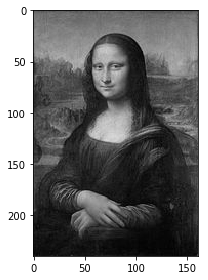

In [72]:
## la même fonction en utilisant les fonctionnalités de numpy
import numpy as np

def convertNGnp(imRVB):
    return np.uint8(0.2989 * imRVB[:,:,0] + 0.5870 * imRVB[:,:,1] + 0.1140 * imRVB[:,:,2])
#test
imNGnp = convertNGnp(io.imread('Images/joconde.png'))
print(imNGnp)
io.imshow(imNGnp)
io.show()

### Exercice 3

In [73]:
import numpy as np

def negatifNG(imNG):
    #récupération des données de taille de l'image en niveaux de gris
    n, m = imNG.shape #pas de 3e dimension pour la couleur
    dtypeNG = imNG.dtype
    #création d'une image en niveau de gris de même taille et même type pour les données
    imNEG = np.zeros( (n, m), dtype = dtypeNG)
    #parcours de l'image pour le niveau de gris pour chaque pixel
    for i in range(n):
        for j in range(m):
            imNEG[i, j] = np.uint8(255) - imNG[i, j]
    return imNEG

In [74]:
##test
imRVB = io.imread('Images/joconde.png')
imNG = convertNG(imRVB)
imNEG = negatifNG(imNG)
imNEG

array([[159, 160, 160, ..., 180, 177, 179],
       [155, 157, 156, ..., 167, 164, 182],
       [149, 152, 150, ..., 154, 154, 153],
       ...,
       [219, 247, 239, ..., 246, 245, 230],
       [200, 239, 237, ..., 247, 245, 191],
       [181, 229, 233, ..., 235, 230, 178]], dtype=uint8)

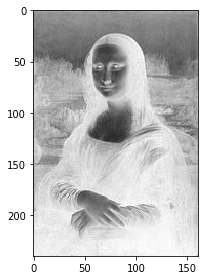

In [75]:
io.imshow(imNEG)
io.show()

[[159 160 160 ... 180 177 179]
 [155 157 156 ... 167 164 182]
 [149 152 150 ... 154 154 153]
 ...
 [219 247 239 ... 246 245 230]
 [200 239 237 ... 247 245 191]
 [181 229 233 ... 235 230 178]]


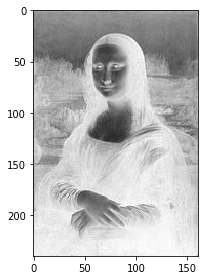

In [76]:
## la même fonction en utilisant les fonctionnalités de numpy
import numpy as np

def convertNEGnp(imNG):
    return 255 - imNG
#test
imNEGnp = convertNEGnp(convertNGnp(io.imread('Images/joconde.png')))
print(imNEGnp)
io.imshow(imNEGnp)
io.show()

### 1.2.4 Conversion en noir et blanc

### 1.2.4.a Exercice 4 - Conversion en noir et blanc par seuillage

On travaille ici sur des images en niveaux de gris au format uint8.  
On renvoie une image en noir et blanc au format même format uint8 (pas de gain en mémoire),  
le noir est codé par un niveau nul,  
le blanc par un niveau à 255.

In [77]:
def NBseuil_uint8(imNG, seuil):
    #récupération des données de taille de l'image en niveaux de gris
    n, m = imNG.shape
    #création d'une image en niveau de gris de même taille et même type pour les données
    imNB = np.zeros( (n, m), dtype = imNG.dtype)
    #parcours de l'image pour le niveau de gris pour chaque pixel
    for i in range(n):
        for j in range(m):
            if imNG[i, j] >= seuil:
                imNB[i, j] = 255
    return imNB

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


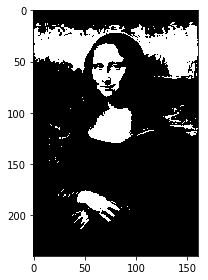

In [78]:
##test
imNG = convertNG(io.imread('Images/joconde.png'))
seuil = 128
imNB = NBseuil_uint8(imNG, seuil)
print(imNB)
io.imshow(imNB)
io.show()

In [79]:
#sauvegarde au format .bmp (bitmap) de l'image en noir et blanc
io.imsave("Images/jocondeNB.bmp", imNB)
#taille de l'image sur disque
import os
print("taille de l'image en couleur au format bitmap (.bmp) :", os.path.getsize("Images/jocondeNB.bmp"), "octets.")
print("On n'observe pas de gain par rapport à l'image en niveaux de gris :")
print("taille de l'image en niveaux de gris au format bitmap (.bmp) :", os.path.getsize("Images/jocondeNG.bmp"))
print("car les valeurs 0 et 1 restent codées sur 8 bits.")
## https://fr.wikipedia.org/wiki/Windows_bitmap
## http://www.apprendre-en-ligne.net/info/images/formatbmp.pdf
#### NOTE : format "maison" - didactique PORTABLE BITMAP
##### http://math.univ-lyon1.fr/irem/Formation_ISN/formation_prog_images/format_bitmap/bitmap.html

taille de l'image en couleur au format bitmap (.bmp) : 40438 octets.
On n'observe pas de gain par rapport à l'image en niveaux de gris :
taille de l'image en niveaux de gris au format bitmap (.bmp) : 40438
car les valeurs 0 et 1 restent codées sur 8 bits.


### image en noir et blanc au format bool  
Ici, on stocke les données au format booléen (la fonction est identique par ailleurs)

In [80]:
def NBseuil_uint8_vers_bool(imNG, seuil):
    #récupération des données de taille de l'image en niveaux de gris
    n, m = imNG.shape
    #création d'une image en niveau de gris de même taille et même type pour les données
    imNBbool = np.zeros( (n, m), dtype = bool)
    #parcours de l'image pour le niveau de gris pour chaque pixel
    for i in range(n):
        for j in range(m):
            imNBbool[i, j] = ( imNG[i, j] >= seuil )
    return imNBbool

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


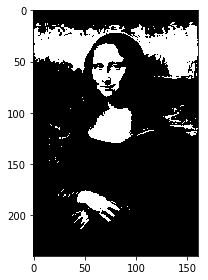

In [81]:
##test
imNG = convertNG(io.imread('Images/joconde.png'))
seuil = 128
imNBbool = NBseuil_uint8_vers_bool(imNG, seuil)
print(imNBbool)
io.imshow(imNBbool)
io.show()

Note : il n'est pas possible de stocker l'image sous la forme d'un fichier .bmp, où chaque pixel serait codé sur un bit.  
cf. ci-dessous

In [82]:
##sauvegarde de l'image
#sauvegarde au format .bmp (bitmap) de l'image en noir et blanc
io.imsave("Images/jocondeNB.bmp", imNBbool)

D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\skimage\io\_io.py:142: UserWarning: Images/jocondeNB.bmp is a boolean image: setting True to 1 and False to 0
  warn('%s is a boolean image: setting True to 1 and False to 0' % fname)


Pour observer le gain de taille en mémoire, on peut stocker le tableau des valeurs, en tant que matrice numpy.  
Référence : https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html  

In [83]:
imRVB = io.imread('Images/joconde.png')
imNG = convertNG(imRVB)
imNBbool = NBseuil_uint8_vers_bool(imNG, seuil = 128)
np.save('Images/jocondeRVB_ndarray.npy', imRVB)
np.save('Images/jocondeNG_ndarray.npy', imNG)
np.save('Images/jocondeNBbool_ndarray.npy', imNBbool)
## affichage des tailles sur disque, en octets :
import os
print("taille de la matrice de l'image en couleur (ndarray dtype = 'uint8', format .npy) :", \
      os.path.getsize('Images/jocondeRVB_ndarray.npy'))
print("taille de la matrice de l'image en niveaux de gris (ndarray dtype = 'uint8', format .npy) :", \
      os.path.getsize('Images/jocondeNG_ndarray.npy'))
print("taille de la matrice de l'image en noir et blanc (ndarray dtype = 'bool', format .npy) :", \
      os.path.getsize('Images/jocondeNBbool_ndarray.npy'))
print("PAS DE GAIN EN MÉMOIRE (voir la doc. de numpy...)")

taille de la matrice de l'image en couleur (ndarray dtype = 'uint8', format .npy) : 116048
taille de la matrice de l'image en niveaux de gris (ndarray dtype = 'uint8', format .npy) : 38768
taille de la matrice de l'image en noir et blanc (ndarray dtype = 'bool', format .npy) : 38768
PAS DE GAIN EN MÉMOIRE (voir la doc. de numpy...)


Cause possible : encodage sur le modèle unicode (chaque caractère est stocké sur un octet minimum)

In [84]:
imRVB = io.imread('Images/joconde.png')
imNG = convertNG(imRVB)
imNBbool = NBseuil_uint8(imNG, seuil = 128)
io.imsave('Images/jocondeRVB.png', imRVB)
io.imsave('Images/jocondeNG.png', imNG)
io.imsave('Images/jocondeNBbool.png', imNBbool)
## affichage des tailles sur disque, en octets :
import os
print("taille de l'image en couleur (format .png) :", \
      os.path.getsize('Images/jocondeRVB.png'))
print("taille de l'image en niveaux de gris (format .png) :", \
      os.path.getsize('Images/jocondeNG.png'))
print("taille de l'image en noir et blanc ( (format .png) :) :", \
      os.path.getsize('Images/jocondeNBbool.png'))
print("LE GAIN POSSIBLE EN MÉMOIRE EST BIEN OBTENU AVEC L'APPLICATION D'ALGORITHMES DE COMPRESSION .png")
## sur la compression .png https://fr.wikipedia.org/wiki/Portable_Network_Graphics

taille de l'image en couleur (format .png) : 69997
taille de l'image en niveaux de gris (format .png) : 23913
taille de l'image en noir et blanc ( (format .png) :) : 1821
LE GAIN POSSIBLE EN MÉMOIRE EST BIEN OBTENU AVEC L'APPLICATION D'ALGORITHMES DE COMPRESSION .png


In [85]:
imRVB = io.imread('Images/joconde.png')
imNG = convertNG(imRVB)
imNBbool = NBseuil_uint8(imNG, seuil = 128)
io.imsave('Images/jocondeRVB.jpg', imRVB)
io.imsave('Images/jocondeNG.jpg', imNG)
io.imsave('Images/jocondeNBbool.jpg', imNBbool)
## affichage des tailles sur disque, en octets :
import os
print("taille de l'image en couleur (format .jpg) :", \
      os.path.getsize('Images/jocondeRVB.jpg'))
print("taille de l'image en niveaux de gris (format .jpg) :", \
      os.path.getsize('Images/jocondeNG.jpg'))
print("taille de l'image en noir et blanc ( (format .jpg) :) :", \
      os.path.getsize('Images/jocondeNBbool.jpg'))
print("LE GAIN POSSIBLE EN MÉMOIRE N'EST PAS OBTENU AVEC L'APPLICATION D'ALGORITHMES DE COMPRESSION .jpg")
## sur la compression .jpg https://fr.wikipedia.org/wiki/JPEG

taille de l'image en couleur (format .jpg) : 8965
taille de l'image en niveaux de gris (format .jpg) : 7585
taille de l'image en noir et blanc ( (format .jpg) :) : 7145
LE GAIN POSSIBLE EN MÉMOIRE N'EST PAS OBTENU AVEC L'APPLICATION D'ALGORITHMES DE COMPRESSION .jpg


### 1.2.4.a Exercice 4 : Conversion par seuillage 

In [86]:
## < à compléter : à l'aide des fonctionnalités de numpy >

### 1.2.4.b Exercice 5 : Conversion par tramage et diffusion d'erreur

On travaille ici sur des images en niveaux de gris au format float64 pour gérer plus facilement les reports d'erreur.  
On renvoie une image en noir et blanc au format même format uint8 (pas de gain en mémoire),  
le noir est codé par un niveau nul,  
le blanc par un niveau à 255.

In [87]:
def tramage(imNGfloat64, sigma):
    #création d'une image en niveau de gris, copie de l'image en entrée
    imNB = imNGfloat64.copy()
    n, m = imNB.shape
    err = 0 #on stocke l'erreur commise dans la variable err (on partage sa valeur comme indiqué dans l'énoncé)
    #parcours de l'image pour le niveau de gris pour chaque pixel (on ne parcourt pas les dernières colonne et ligne)
    for i in range(n-1):
        for j in range(m-1):
            nivNG = imNB[i, j] ##niveau de gris pour le pixel (i, j)
            if imNB[i, j] >= sigma:
                imNB[i, j] = 1
                err = 1 - nivNG## erreur qui sera commise en remplaçant imNB[i, j] par la valeur 1
                ## ici err est >= 0 : on a surévalué l'intensité du pixel (i, j)
                ##on doit distribuer des valeurs négatives sur les pixels adjacents
            else:
                imNB[i, j] = 0
                err = 0 - nivNG## erreur qui sera commise en remplaçant imNB[i, j] par la valeur 0
                ## ici err < 0 : on a sous-évalué l'intensité du pixel (i, j)
                ##on doit distribuer des valeurs positives sur les pixels adjacents
            ##répartition de l'erreur sur les trois pixels adjacents
            ##dans l'ordre, au-dessous, à droite
            imNB[i+1, j] += - err/4; imNB[i, j+1] += - err/4
            ##au-dessous et à droite (i.e. en diagonale, vers le bas))
            imNB[i+1, j+1] += - err/2
    ##on traite les pixels de la dernière colonne et de la dernière ligne, par rapport au seuil (sans report d'erreur)
    j = m - 1 #dernière colonne
    for i in range(n):
        if imNB[i, j] >= sigma:
            imNB[i, j] = 1
        else:
            imNB[i, j] = 0
    i = n - 1 #dernière ligne
    for j in range(m-1):
        if imNB[i, j] >= sigma:
            imNB[i, j] = 1
        else:
            imNB[i, j] = 0
    return imNB

In [88]:
##test

## chargement de l'image directement en niveaux de gris
#cf. https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread
imNGnew = io.imread('Images/joconde.png', as_gray = True)
print("taille de l'image chargée :", imNGnew.shape)
print("data-type de l'image chargée :", imNGnew.dtype)

taille de l'image chargée : (240, 161)
data-type de l'image chargée : float64


[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


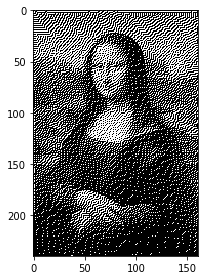

In [89]:
sigma = 0.5
imNBtramage = tramage(imNGnew, sigma=sigma)
print(imNBtramage)
#sauvegarde
io.imsave('Images/jocondeNBtramage_seuil=' + str(sigma) + '.bmp', imNBtramage)
#affichage
io.imshow(imNBtramage)
io.show()

[[1. 1. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 1.]]


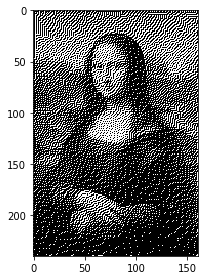

In [90]:
sigma = 0.15
imNBtramage = tramage(imNGnew, sigma=sigma)
print(imNBtramage)
#sauvegarde
#io.imsave('Images/jocondeNBtramage_seuil=' + str(sigma) + '.bmp', imNBtramage)
#affichage
io.imshow(imNBtramage)
io.show()

### Résulat peu probant voir ci-dessous avec une image de meilleure définition

## second test sur une image de meilleure définition

(2975, 1992, 3) uint8


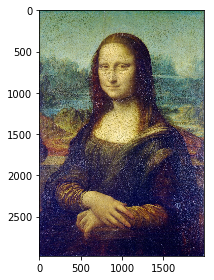

In [91]:
## second test 
##télécharger image la joconde en haute définition
##téléchargement de l'image
def download_image(img_url):
    from PIL import Image; from io import BytesIO
    import requests; import numpy as np
    return np.array(Image.open(BytesIO(requests.get(img_url).content)))

url = 'http://3d-art-ebooks.com/wp-content/uploads/2013/06/La-Joconde-en-Hd.2.4-Mo-.jpg'
im_monalisa = download_image(url)
print(im_monalisa.shape, im_monalisa.dtype)
io.imshow(im_monalisa)
io.show()

(2975, 1992) float64


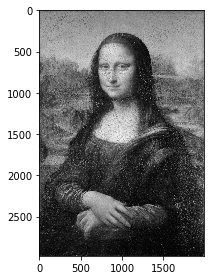

In [92]:
#https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html
#poids skimage : Y = 0.2125 R + 0.7154 G + 0.0721 B
def convertNGnpfloat64(imRVB):
    #return (0.2989 * imRVB[:,:,0] + 0.5870 * imRVB[:,:,1] + 0.1140 * imRVB[:,:,2]) / 255
    return (0.2125 * imRVB[:,:,0] + 0.7154 * imRVB[:,:,1] + 0.0721 * imRVB[:,:,2]) / 255
im_monalisaNG = convertNGnpfloat64(im_monalisa)
print(im_monalisaNG.shape, im_monalisaNG.dtype)

#affichage
io.imshow(im_monalisaNG)
io.show()

(2975, 1992)
[[1. 0. 1. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


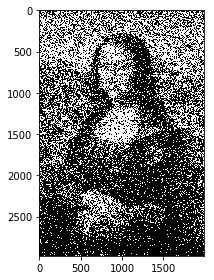

In [93]:
sigma = 0.5
im_monalisaNBtramage = tramage(im_monalisaNG, sigma=sigma)
print(im_monalisaNBtramage.shape)
print(im_monalisaNBtramage)
#sauvegarde
io.imsave('Images/monalisaNBtramage_seuil=' + str(sigma) + '.bmp', im_monalisaNBtramage)
#affichage
io.imshow(im_monalisaNBtramage)
io.show()

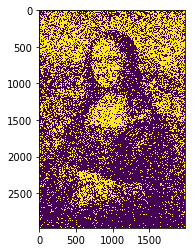

In [94]:
import matplotlib.pyplot as plt
plt.imshow(im_monalisaNBtramage)
plt.show() ##facultatif sous Jupyter ; nécessaire avec IDLE

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]]


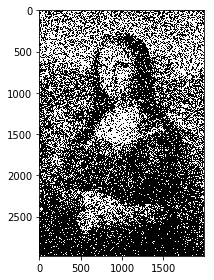

In [95]:
sigma = 0.25
im_monalisaNBtramage = tramage(im_monalisaNG, sigma=sigma)
print(im_monalisaNBtramage)
#sauvegarde
io.imsave('Images/monalisaNBtramage_seuil=' + str(sigma) + '.bmp', im_monalisaNBtramage)
#affichage
io.imshow(im_monalisaNBtramage)
io.show()

### L'affichage n'est pas adapté ici  (trop petit)
#### les images obtenues sont visibles ici  
avec seuil 0.25  
https://jupyterhub.ac-paris.fr/user/luc.baille/view/PSI%202019-2020/Images/monalisaNBtramage_seuil%3D0.25.bmp 
avec seuil 0.5  
https://jupyterhub.ac-paris.fr/user/luc.baille/view/PSI%202019-2020/Images/monalisaNBtramage_seuil%3D0.5.bmp

(540, 960, 3)


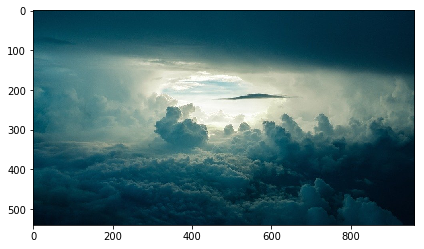

In [96]:
## troisième test
##télécharger image de ciel
##téléchargement de l'image
def download_image(img_url):
    from PIL import Image; from io import BytesIO
    import requests; import numpy as np
    return np.array(Image.open(BytesIO(requests.get(img_url).content)))

url = 'https://cdn.pixabay.com/photo/2015/03/26/09/47/sky-690293_960_720.jpg'
im_ciel = download_image(url)
print(im_ciel.shape)
io.imshow(im_ciel)
io.show()

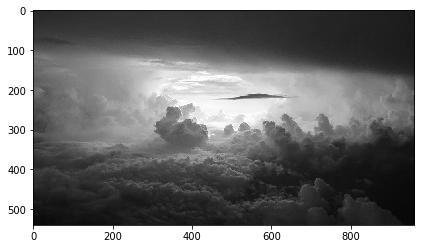

In [97]:
import skimage as sk
im_cielNG = sk.color.rgb2gray(im_ciel)
io.imshow(im_cielNG)
io.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


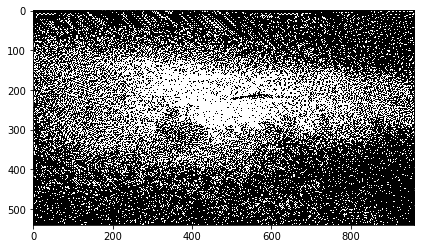

In [98]:
sigma = 0.5
im_cielNBtramage = tramage(im_cielNG, sigma=sigma)
print(im_cielNBtramage)
#sauvegarde
io.imsave('Images/im_cielNBtramage_seuil=' + str(sigma) + '.bmp', im_cielNBtramage)
#affichage
io.imshow(im_cielNBtramage)
io.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


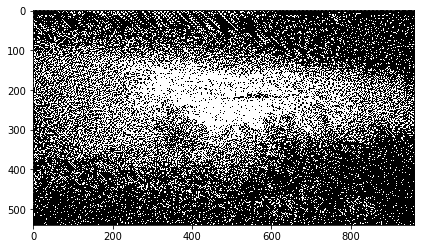

In [99]:
sigma = 0.25
im_cielNBtramage = tramage(im_cielNG, sigma=sigma)
print(im_cielNBtramage)
#sauvegarde
io.imsave('Images/im_cielNBtramage_seuil=' + str(sigma) + '.bmp', im_cielNBtramage)
#affichage
io.imshow(im_cielNBtramage)
io.show()

### L'affichage n'est pas adapté ici  (trop petit)
#### les images obtenues sont visibles ici  
avec seuil 0.25  
https://jupyterhub.ac-paris.fr/user/luc.baille/view/PSI%202019-2020/Images/im_cielNBtramage_seuil%3D0.25.bmp 
avec seuil 0.5  
https://jupyterhub.ac-paris.fr/user/luc.baille/view/PSI%202019-2020/Images/im_cielNBtramage_seuil%3D0.5.bmp

### 1.2.5 Filtrage

Dans cette partie, on travaille sur des images au format flottant.  

In [100]:
## Fonction pour appliquer un filtre F, np.array de taille p x q, à un pixel d'une image en niveaux de gris
## p, q impairs

def appli_filtre_pixel(imNGfloat, F, i, j):
    p, q = F.shape
    pdemi, qdemi = p // 2, q // 2
    s = 0
    for k in range(p):
        for l in range(q):
            s += imNGfloat[i - pdemi + k][j - qdemi + l] * F[k, l]
    return s

## Fonction pour appliquer un filtre F, np.array de taille p x q, à tous les points d'une image
## le filtre ne sera pas appliqué aux lignes et colonnes bordant l'image 
def appli_filtre_image(imNGfloat, F):
    imNGnew = imNGfloat.copy()
    n, m = imNGnew.shape
    p, q = F.shape
    pdemi, qdemi = p // 2, q // 2
    for i in range(pdemi, n - pdemi):
        for j in range(qdemi, m - qdemi):
            imNGnew[i, j] = appli_filtre_pixel(imNGfloat, F, i, j)
    return imNGnew

#### 1.2.5a. Filtrage par floutage

In [101]:
F0 = np.ones((3, 3), dtype='float64') / 9

float64


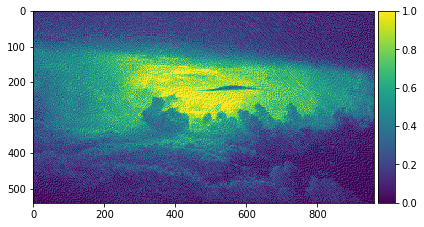

In [102]:
## application à l'image du ciel obtenue par tramage (seuil = 0.5)
im_cielNBtramage05 = tramage(im_cielNG, sigma=0.5)
print(im_cielNBtramage05.dtype)
im_cielNGnew = appli_filtre_image(im_cielNBtramage05, F0)
io.imshow(im_cielNGnew)
io.show()

In [103]:
## La couleur est mal rendue car il y a des valeurs (suite aux arrondis dans les calculs avec les 
## flottants qui ne sont pas dans l'intervalle [0, 1]
np.max(im_cielNGnew)

1.0000000000000002

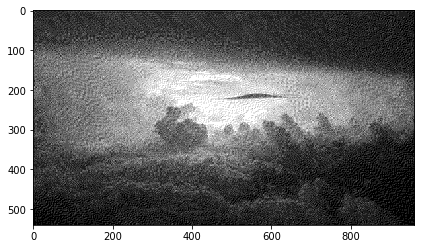

In [104]:
io.imshow(im_cielNGnew / np.max(im_cielNGnew))
io.show()

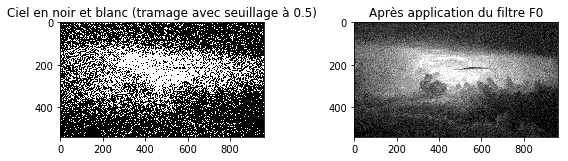

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(im_cielNBtramage05, cmap=plt.cm.gray)
ax[0].set_title("Ciel en noir et blanc (tramage avec seuillage à 0.5)")
ax[1].imshow(im_cielNGnew, cmap=plt.cm.gray)
ax[1].set_title("Après application du filtre F0")

fig.tight_layout()
plt.show()

### 1.2.6 Pixellisation

#### 1.2.5.a. Réduction

In [106]:
def reduction4(imRVB):
    n, m, c = imRVB.shape
    n4, m4 = n // 2, m // 2
    dtype_imRVB = imRVB.dtype
    imRVBnew = np.zeros((n4, m4, c), dtype = dtype_imRVB)
    for i in range(0, n - 1, 2):
        for j in range(0, m - 1, 2):
            for canal in range(c):
                imRVBnew[i // 2, j // 2, canal] = imRVB[i, j, canal] / 4 + imRVB[i, j + 1, canal] / 4 + \
                                                  imRVB[i + 1, j, canal] / 4 + imRVB[i + 1, j + 1, canal] / 4
    return imRVBnew

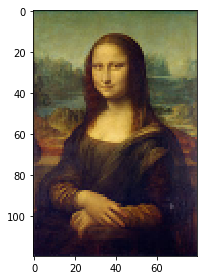

In [107]:
imRVB=io.imread('Images/joconde.png')
jocRED = reduction4(imRVB)
io.imshow(jocRED)
io.show()

In [108]:
## Gain en mémoire


#### 1.2.5.b. Agrandissement

In [109]:
def agrandissement4(imRVB):
    n, m, c = imRVB.shape
    n4, m4 = 2 * n - 1, 2 * m - 1
    dtype_imRVB = imRVB.dtype
    imRVBnew = np.zeros((n4, m4, c), dtype = dtype_imRVB)
    ##recopie à l'identique
    for i in range(0, n4, 2):
        for j in range(0, m4, 2):
            imRVBnew[i, j] = imRVB[i // 2, j // 2]
    
    for i in range(1, n4 - 1, 2):
        for j in range(0, m4, 2):
            for canal in range(c):
                imRVBnew[i, j, canal] = imRVB[(i - 1) // 2 , j // 2, canal] / 2 + \
                                        imRVB[(i - 1) // 2 + 1, j // 2, canal] / 2
    
    for i in range(0, n4, 2):
        for j in range(1, m4 - 1, 2):
            for canal in range(c):
                imRVBnew[i, j, canal] = imRVB[i // 2 , (j - 1) // 2, canal] / 2 + \
                                        imRVB[i // 2 , (j - 1) // 2 + 1, canal] / 2
    
    for i in range(1, n4 - 1, 2):
        for j in range(1, m4 - 1, 2):
            for canal in range(c):
                imRVBnew[i, j, canal] = imRVBnew[i - 1, j, canal] / 4 + \
                                        imRVBnew[i + 1, j, canal] / 4 + \
                                        imRVBnew[i, j - 1, canal] / 4 + \
                                        imRVBnew[i, j + 1, canal] / 4
    """
    """
    return imRVBnew

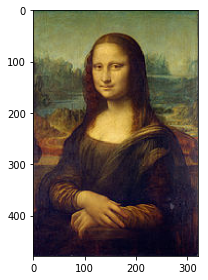

In [110]:
imRVB=io.imread('Images/joconde.png')
jocAGD = agrandissement4(imRVB)
io.imshow(jocAGD)
io.show()

### 1.2.7 Histogramme des couleurs

In [111]:
## on travaille sur une image dont le dtype est uint8
## il y a 256 niveaux possibles pour chaque canal de couleur
imRVB=io.imread('Images/joconde.png')
n, m, c = imRVB.shape
Lr, Lv, Lb = [0] * 255, [0] * 255, [0] * 255 #liste des effectifs par couleur, initialisées à zéro
for i in range(n):
    for j in range(m):
        r, v, b = imRVB[i, j]
        Lr[r] += 1 #on ajoute 1 pour le niveau r (0<=r<=255) dans la liste Lr
        Lv[v] += 1 #de même pour le niveau de vert
        Lb[b] += 1 #de même pour le niveau de bleu

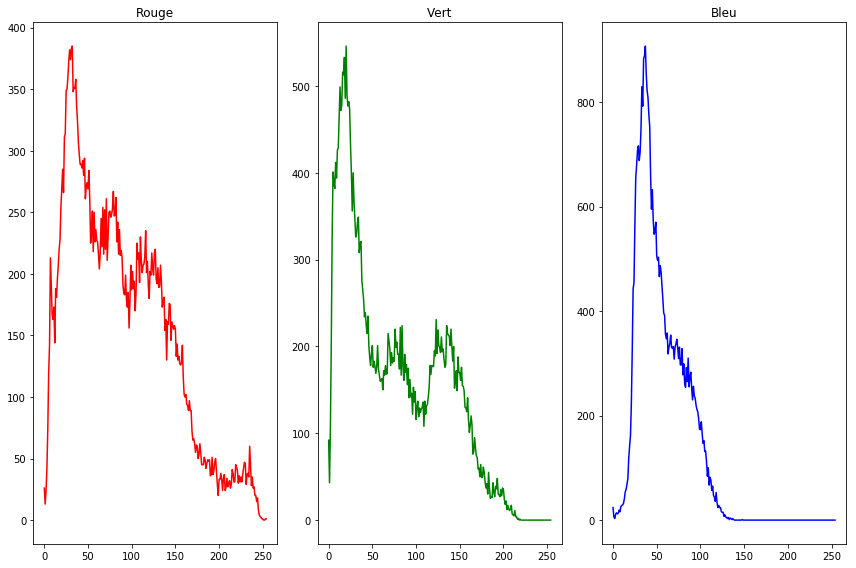

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].plot(Lr, 'r')
ax[0].set_title("Rouge")
ax[1].plot(Lv, 'g')
ax[1].set_title("Vert")
ax[2].plot(Lb, 'b')
ax[2].set_title("Bleu")

fig.tight_layout()
plt.show()

### 1.2.8. Recherche de contours

### On travaillera avec des matrices de flottants pour éviter les overflow lors de la multiplication terme à terme par les filtres

In [113]:
##téléchargement de l'image
def download_image(img_url):
    from PIL import Image; from io import BytesIO
    import requests; import numpy as np
    return np.array(Image.open(BytesIO(requests.get(img_url).content)))

im_joconde = download_image('https://capytale.ac-paris.fr/pj/75/luc.baille/joconde.png')
im_rouen = download_image('https://capytale.ac-paris.fr/pj/75/luc.baille/cathedrale-Rouen.jpg')
im_aigle = download_image('https://capytale.ac-paris.fr/pj/75/luc.baille/eagle-1523807-1278x958.jpg')
im_factory = download_image('https://capytale.ac-paris.fr/pj/75/luc.baille/factory-1880261_1920.jpg')
im_rubik = download_image('https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Rubiks_cube_by_keqs.jpg/600px-Rubiks_cube_by_keqs.jpg')

uint8
float64


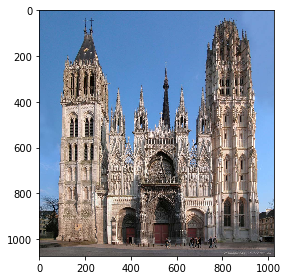

In [114]:
##conversion de l'image au format flottant
print(im_rouen.dtype)
imf = im_rouen[:,:,:] / 255
print(imf.dtype)
io.imshow(im_rouen)

In [115]:
##On définit d'abord les filtres
Fx = 1/8 * np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
Fy = 1/8 * np.dot(np.transpose(np.array([[-1, 0, 1]])), np.array([[1, 2, 1]]))
print(Fx.dtype, Fy.dtype)
print(Fx.shape, Fy.shape)
Fy

float64 float64
(3, 3) (3, 3)


array([[-0.125, -0.25 , -0.125],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.125,  0.25 ,  0.125]])

In [116]:
np.array([[-1, 0, 1]]).shape

(1, 3)

In [117]:
def sobel(im): 
    """im est supposée être une image en couleurs avec des données de type 'float64', comprises entre 0 et 1"""
    h, w, c = im.shape
    ##conversion de l'image en niveaux de gris
    imNG = (im[:,:,0] + im[:,:,1] + im[:,:,2]) / 3
    S = np.zeros((h,w), dtype='float64')
    for i in range(1, h - 1): ##on exclut les bords [ces coefficients resteront à zéro]
        for j in range(1, w - 1):
            S[i, j] = np.sqrt(  np.sum( Fx * imNG[i - 1: i + 2, j - 1: j + 2] ) ** 2 
                              + np.sum( Fy * imNG[i - 1: i + 2, j - 1: j + 2] ) ** 2 )
    print(np.max(S))
    return S / np.max(S) ##on ramène les valeurs entre 0 et 1 pour rendu correct du résultat

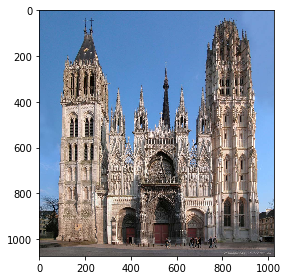

In [118]:
#image cathédrale
io.imshow(im_rouen)
io.show()

In [119]:
from time import clock
t0 = clock()
im_contours_rouen = sobel(im_rouen) ## le traitement est long en temps (compter 30 s)
print("temps :", clock() - t0, "secondes")

D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


47.38601088694614
temps : 15.283569200000002 secondes


D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


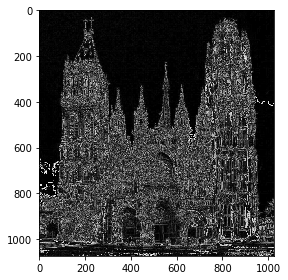

In [120]:
io.imshow(im_contours_rouen)

In [121]:
im_contours_joconde = sobel(im_joconde)

45.43684567005553


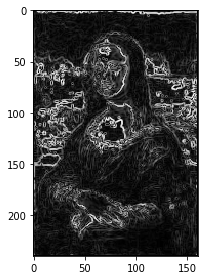

In [122]:
io.imshow(im_contours_joconde)

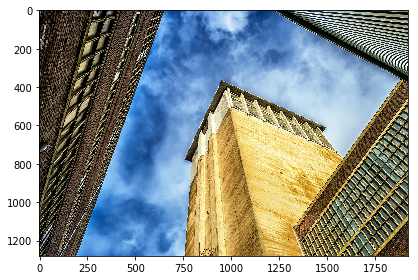

In [123]:
#image factory
io.imshow(im_factory)
io.show()

47.47930835871794


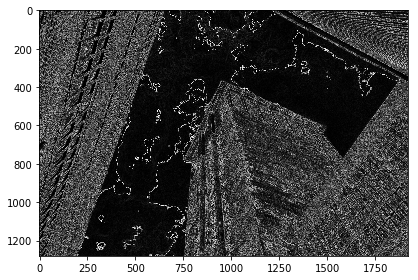

In [124]:
im_contours_factory = sobel(im_factory) ##images de cubes https://unsplash.com/s/photos/cube
io.imshow(im_contours_factory)
io.show()

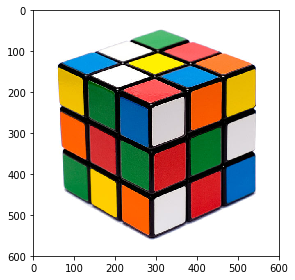

In [125]:
#image rubik
io.imshow(im_rubik)
io.show()

47.33010552374555


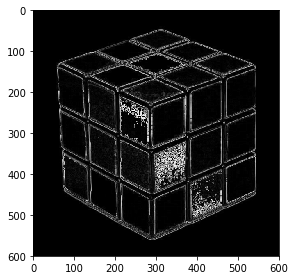

In [126]:
im_contours_rubik = sobel(im_rubik)
io.imshow(im_contours_rubik)

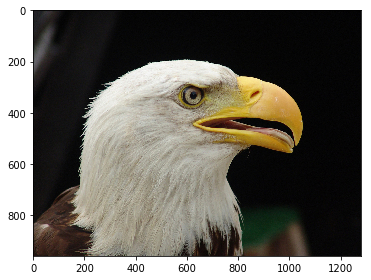

In [127]:
#image aigle
io.imshow(im_aigle)
io.show()

In [128]:
im_contours_aigle = sobel(im_aigle)

46.792427271942195


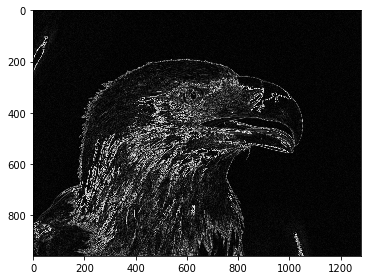

In [129]:
io.imshow(im_contours_aigle)

D:\WPy-3710\python-3.7.1.amd64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


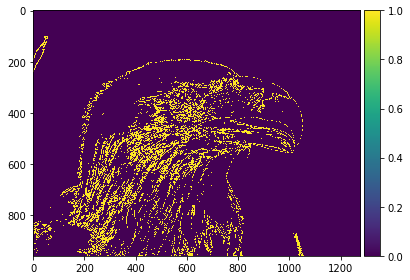

In [130]:
a = im_contours_aigle
io.imshow(np.where(a < 0.3, 0, 1))

### Photos supplémentaires 
https://www.agoravox.fr/culture-loisirs/etonnant/article/la-joconde-en-hd-137153
ciel
https://cdn.pixabay.com/photo/2015/03/26/09/47/sky-690293_960_720.jpg


In [ ]:
##télécharger image de ciel
##téléchargement de l'image
def download_image(img_url):
    from PIL import Image; from io import BytesIO
    import requests; import numpy as np
    return np.array(Image.open(BytesIO(requests.get(img_url).content)))

url = 'https://cdn.pixabay.com/photo/2015/03/26/09/47/sky-690293_960_720.jpg'
im_ciel = download_image(url)

In [ ]:
type(im_ciel)